# Final Project Training Data

**EEL 5840 Fundamentals of Machine Learning**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import tensorflow as tf
from sklearn.metrics import accuracy_score
from skimage.transform import resize

## Load the Training data

In [23]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')



X_train = resize(X_train, (1200,50, 50))

Classes are evenly represented:

In [24]:
X_train.shape

(1200, 50, 50)

In [25]:
labels, counts = np.unique(y_train,return_counts=True)

print(labels)
print(counts)
print('Total:',sum(counts),'samples')

[0 1 2 3 4 5 6 7 8 9]
[120 120 120 120 120 120 120 120 120 120]
Total: 1200 samples


### Some examples per digit

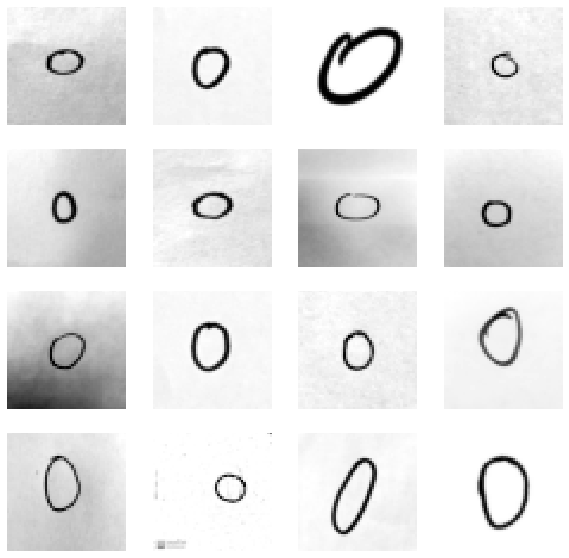

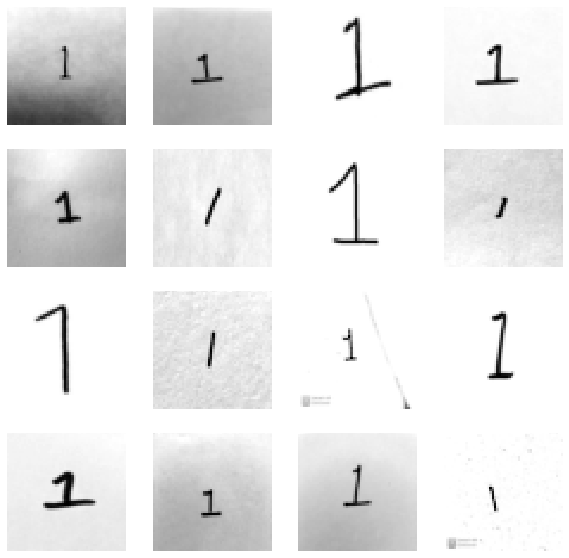

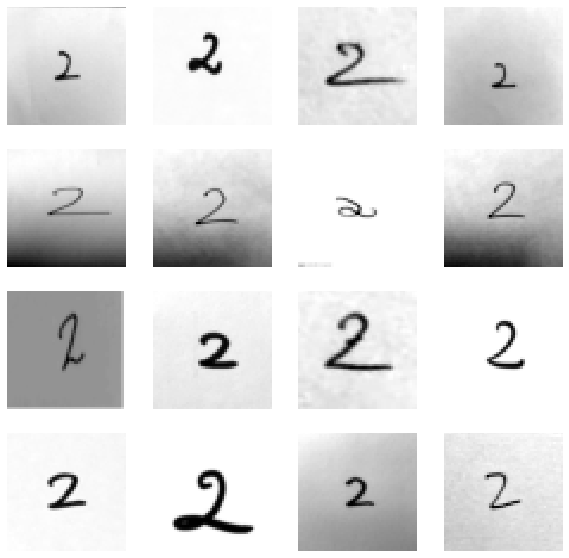

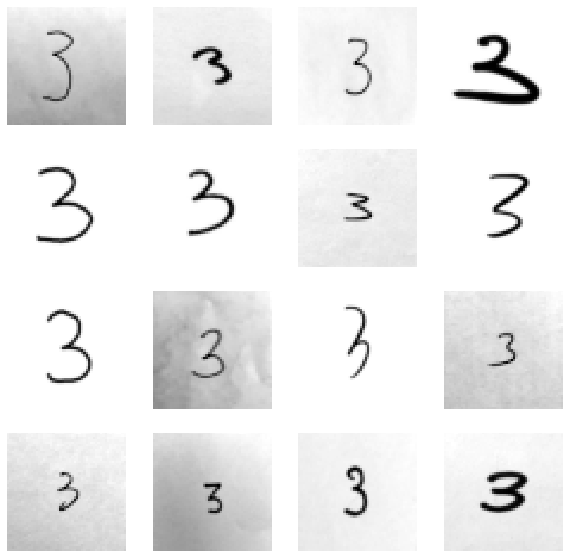

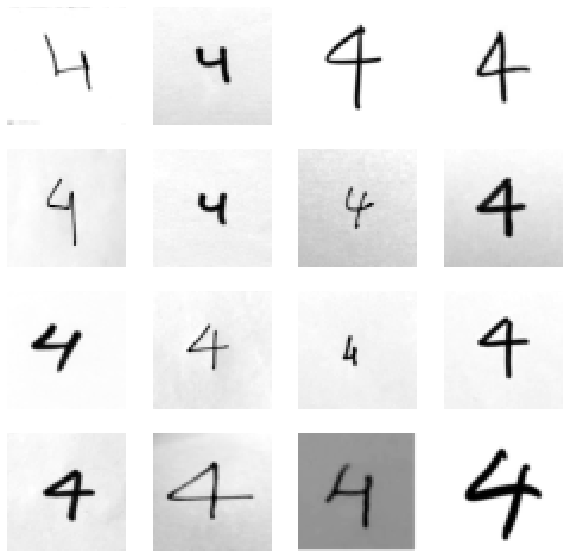

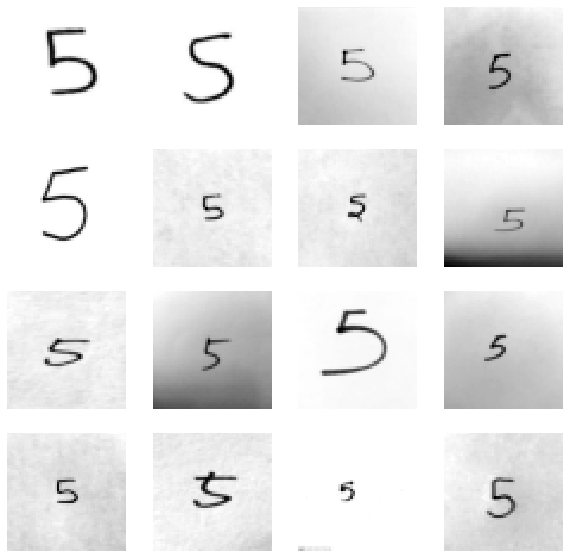

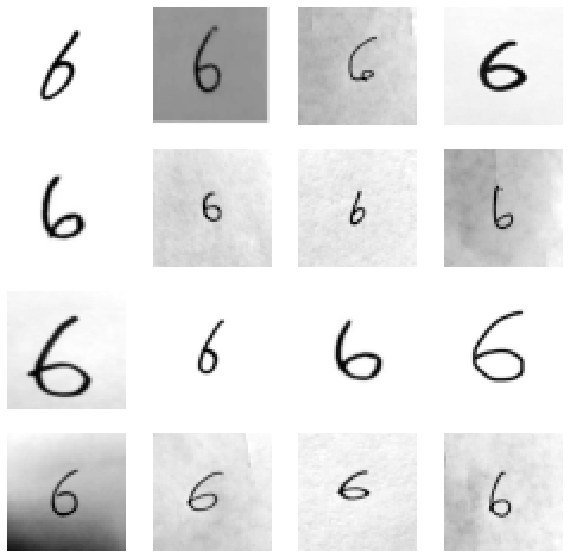

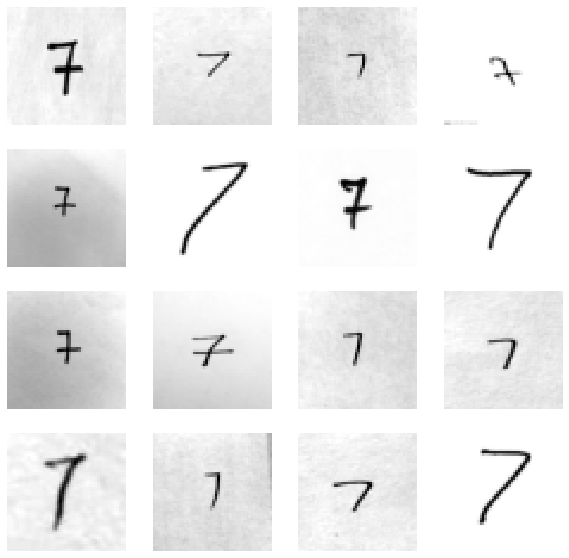

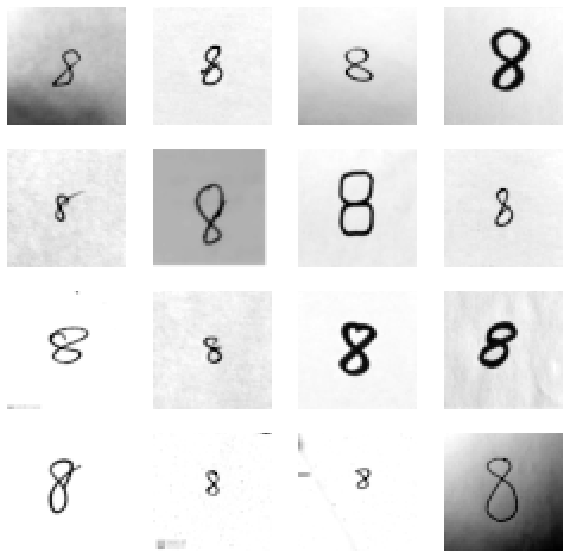

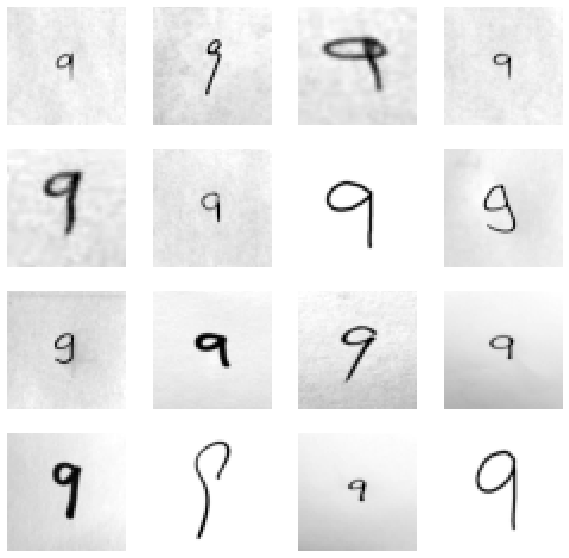

In [26]:
for i in range(10):
    idx = np.where(y_train == i)[0]
    random.shuffle(idx)
    
    fig = plt.figure(figsize=(10,10))
    for j in range(16):
        fig.add_subplot(4,4,j+1)
        plt.imshow(X_train[idx[j],:,:],cmap='gray')
        plt.axis('off')

In [27]:
# Larger CNN for the handwritten digits Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline



from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [28]:
#Splitting the data into training and test set
X_train, X_test, y_train, y_test = train_test_split( X_train, y_train, test_size=0.2, random_state=3)
X_train.shape

(960, 50, 50)

In [29]:
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 50, 50, 1)).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 50, 50, 1).astype('float32')

In [30]:
# one hot encode outputs
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)
num_classes = y_test.shape[1]


In [31]:
#Performing data Augumentation on the image
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)




In [11]:
# define the CNN model
def CNN_Model():
    # create model
  
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (50,50,1)))
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))
    optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
    # Compile model
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
    return model
#Adaptively changing the learning rate
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',  patience=5, verbose=1, factor=0.2,  min_lr=0.00005)
epochs = 150
batch_size = 64
# build the model
model = CNN_Model()
# Fit the model
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(" Final Test Accuracy: %.2f%%" % (scores[1]*100))


Epoch 1/150
 - 5s - loss: 2.4403 - accuracy: 0.0896 - val_loss: 2.3027 - val_accuracy: 0.0917
Epoch 2/150
 - 5s - loss: 2.3031 - accuracy: 0.0917 - val_loss: 2.3031 - val_accuracy: 0.1042
Epoch 3/150
 - 5s - loss: 2.3063 - accuracy: 0.0969 - val_loss: 2.3042 - val_accuracy: 0.0750
Epoch 4/150
 - 5s - loss: 2.3015 - accuracy: 0.1073 - val_loss: 2.2983 - val_accuracy: 0.0833
Epoch 5/150
 - 5s - loss: 2.3137 - accuracy: 0.1156 - val_loss: 2.2848 - val_accuracy: 0.1667
Epoch 6/150
 - 5s - loss: 2.2681 - accuracy: 0.1562 - val_loss: 2.0781 - val_accuracy: 0.3250
Epoch 7/150
 - 5s - loss: 2.1783 - accuracy: 0.2167 - val_loss: 1.8966 - val_accuracy: 0.4000
Epoch 8/150
 - 5s - loss: 2.0847 - accuracy: 0.2542 - val_loss: 1.7100 - val_accuracy: 0.4167
Epoch 9/150
 - 5s - loss: 2.0411 - accuracy: 0.2771 - val_loss: 1.7868 - val_accuracy: 0.4833
Epoch 10/150
 - 5s - loss: 1.9809 - accuracy: 0.3063 - val_loss: 1.6467 - val_accuracy: 0.5292
Epoch 11/150
 - 5s - loss: 1.9135 - accuracy: 0.3333 - val_

Epoch 86/150
 - 6s - loss: 0.2052 - accuracy: 0.9344 - val_loss: 0.3017 - val_accuracy: 0.9458
Epoch 87/150
 - 6s - loss: 0.2059 - accuracy: 0.9406 - val_loss: 0.2890 - val_accuracy: 0.9500
Epoch 88/150
 - 6s - loss: 0.2171 - accuracy: 0.9323 - val_loss: 0.2893 - val_accuracy: 0.9500
Epoch 89/150
 - 6s - loss: 0.2374 - accuracy: 0.9229 - val_loss: 0.2862 - val_accuracy: 0.9500
Epoch 90/150
 - 6s - loss: 0.2056 - accuracy: 0.9385 - val_loss: 0.2870 - val_accuracy: 0.9500
Epoch 91/150
 - 6s - loss: 0.2218 - accuracy: 0.9281 - val_loss: 0.2813 - val_accuracy: 0.9500
Epoch 92/150
 - 6s - loss: 0.2049 - accuracy: 0.9333 - val_loss: 0.2786 - val_accuracy: 0.9500
Epoch 93/150
 - 6s - loss: 0.2168 - accuracy: 0.9406 - val_loss: 0.2773 - val_accuracy: 0.9417
Epoch 94/150
 - 6s - loss: 0.1821 - accuracy: 0.9490 - val_loss: 0.2752 - val_accuracy: 0.9458
Epoch 95/150
 - 6s - loss: 0.1722 - accuracy: 0.9448 - val_loss: 0.2755 - val_accuracy: 0.9500
Epoch 96/150
 - 6s - loss: 0.1726 - accuracy: 0.95

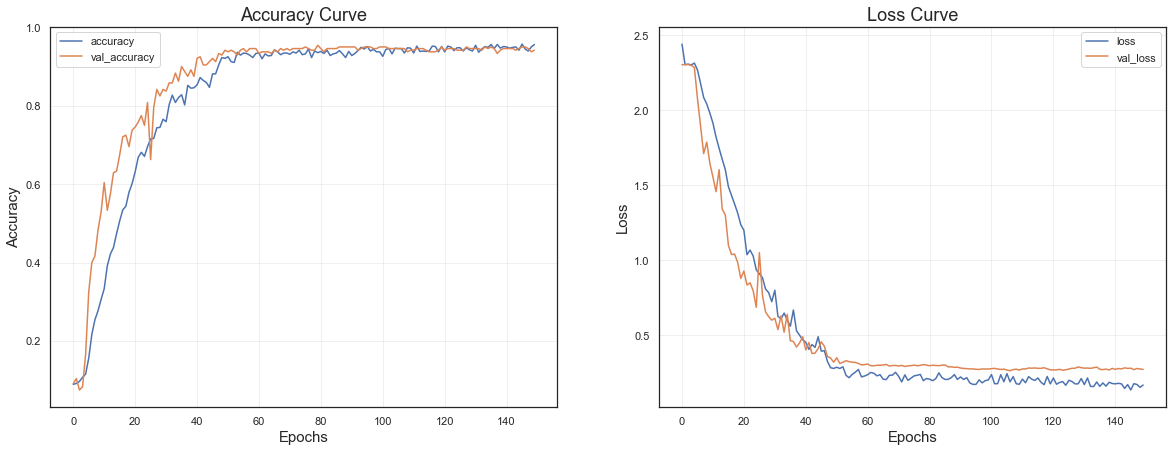

In [21]:
#Plotting the accuracy and loss curve
f = plt.figure(figsize=(20,7))

#Adding Subplot 1 (For Accuracy)
f.add_subplot(121)

plt.plot(history.epoch,history.history['accuracy'],label = "accuracy") # Accuracy curve for training set
plt.plot(history.epoch,history.history['val_accuracy'],label = "val_accuracy") # Accuracy curve for validation set

plt.title("Accuracy Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

#Adding Subplot 1 (For Loss)
f.add_subplot(122)

plt.plot(history.epoch,history.history['loss'],label="loss") # Loss curve for training set
plt.plot(history.epoch,history.history['val_loss'],label="val_loss") # Loss curve for validation set

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()


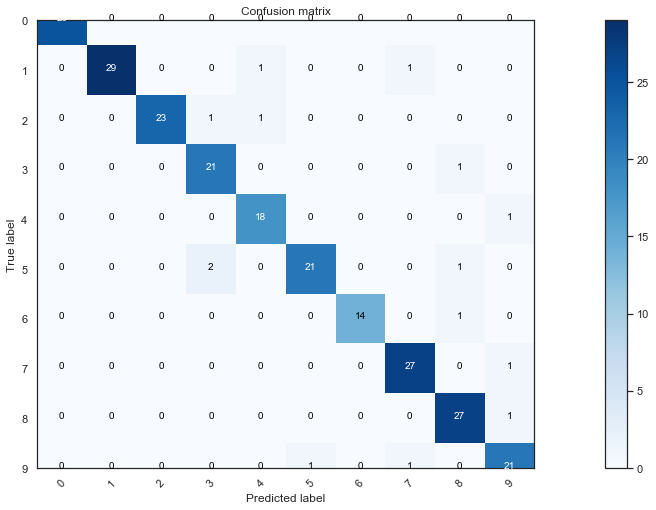

In [32]:
#Plotting the confusion matrix of the test  result
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.figure(figsize=(20,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_test = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [13]:
model.save('final_model.h5')

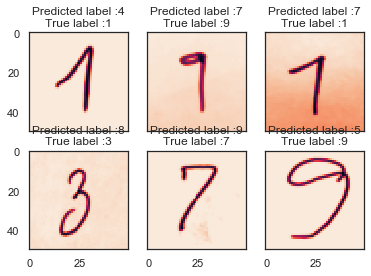

<Figure size 576x288 with 0 Axes>

In [15]:
#veiwing some of the misclassified results

sns.set(style='white', context='notebook', palette='deep')
errors = (Y_pred_classes - y_test != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = y_test[errors]
X_val_errors = X_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    #This function shows 6 misclassified images with their predicted and real labels
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    fig = plt.figure(figsize=(8, 4))
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((50,50)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

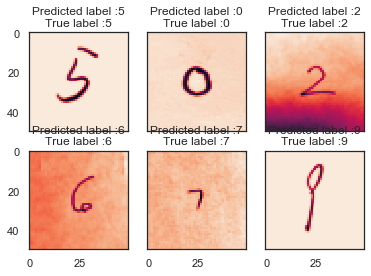

In [94]:
#viewing some of the  correctly classified results
sns.set(style='white', context='notebook', palette='deep')
correct = (Y_pred_classes - y_test ==0)

Y_pred_classes_correct = Y_pred_classes[correct]
Y_pred_correct = Y_pred[correct]
Y_true_correct = y_test[correct]
X_val_correct = X_test[correct]

def display_correct(correct_index,img_correct,pred_correct, obs_correct):
    #This function shows 6 correctly classified images with their predicted and real labels
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            correct= correct_index[n]
            ax[row,col].imshow((img_correct[correct]).reshape((50,50)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_correct[correct],obs_correct[correct]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_correct_prob = np.max(Y_pred_correct,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_correct = np.diagonal(np.take(Y_pred_correct, Y_true_correct, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_correct = Y_pred_correct_prob - true_prob_correct

# Sorted list of the delta prob errors
sorted_dela_correct = np.argsort(delta_pred_true_correct)

# Top 6 errors 
most_important_correct = sorted_dela_correct[-9:]

# Show the top 6 errors
display_correct(most_important_correct, X_val_correct, Y_pred_classes_correct, Y_true_correct)

In [34]:
evaluate(X_test,y_test)

Test accuracy for test Dataset: 94.17%
